In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [71]:
bitcoin = pd.read_csv('bitcoin.txt')
twitter = pd.read_csv('twitter_eda.txt')

## Bitcoin dataset

In [72]:
bitcoin.tail(10)

,Unnamed: 0,time,open,close,high,low,volume
9990,9990,2021-04-12 11:31:00,59939.000000,59903.000000,59939.000000,59903.000,3.147370
9991,9991,2021-04-12 11:30:00,59946.036204,59939.443000,59946.036204,59939.443,0.536182
9992,9992,2021-04-12 11:29:00,59946.000000,59963.000000,59966.000000,59946.000,0.633691
9993,9993,2021-04-12 11:28:00,59974.000000,59946.000000,59974.217028,59946.000,1.013063
9994,9994,2021-04-12 11:27:00,60000.482297,59974.000000,60000.482297,59974.000,1.806383
9995,9995,2021-04-12 11:26:00,60000.000000,60000.000000,60000.482297,60000.000,2.269179
9996,9996,2021-04-12 11:25:00,60013.000000,60000.000000,60014.000000,60000.000,1.960719
9997,9997,2021-04-12 11:24:00,60013.000000,60013.000000,60013.934448,60013.000,0.390078
9998,9998,2021-04-12 11:23:00,60031.000000,60012.000000,60031.000000,60012.000,0.909728
9999,9999,2021-04-12 11:22:00,60025.000000,60030.669608,60031.000000,60025.000,0.060630


In [73]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Unnamed: 0    10000 non-null int64
time          10000 non-null object
open          10000 non-null float64
close         10000 non-null float64
high          10000 non-null float64
low           10000 non-null float64
volume        10000 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 547.0+ KB


In [74]:
bitcoin[['date', 'time']] = bitcoin.time.str.split(' ', expand = True)
bitcoin['time'] = bitcoin[['date', 'time']].apply(lambda x: ' '.join(x), axis = 1)
bitcoin['time'] = pd.to_datetime(bitcoin['time'])

In [75]:
bitcoin.head()

,Unnamed: 0,time,open,close,high,low,volume,date
0,0,2021-04-19 10:04:00,56572.0,56553.000000,56628.000000,56552.000000,4.975340,2021-04-19
1,1,2021-04-19 10:03:00,56666.0,56574.000000,56666.000000,56551.649294,11.875513,2021-04-19
2,2,2021-04-19 10:02:00,56694.0,56666.636456,56701.000000,56666.000000,1.559669,2021-04-19
3,3,2021-04-19 10:01:00,56778.0,56694.000000,56778.000000,56694.000000,2.271022,2021-04-19
4,4,2021-04-19 10:00:00,56719.0,56779.155929,56808.657034,56719.000000,1.862801,2021-04-19


In [76]:
#Reversing the dataset to match the time series of twitter data
bitcoin = bitcoin.loc[::-1].reset_index(drop = True)

## Twitter Dataset

In [77]:
twitter.isnull().sum()

Unnamed: 0      0
time            0
likes           0
no:rt           0
clean_tweet     1
sentiment       0
polarity        0
subjectivity    0
dtype: int64

In [78]:
twitter[['date', 'time']] = twitter.time.str.split(', ', expand = True)
twitter['time'] = twitter[['date', 'time']].apply(lambda x: ' '.join(x), axis = 1)
twitter['time'] = pd.to_datetime(twitter['time'])

In [79]:
twitter.head(10)

,Unnamed: 0,time,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity,date
0,0,2021-04-12 21:00:00,0,0,Biggest Losers 1 hr Bitcoin Standard Hashrate ...,negative,-0.100000,0.100000,2021-04-12
1,1,2021-04-12 21:00:00,1,0,Top 5 Cryptocurrencies Current Prices Bitcoin ...,positive,0.250000,0.450000,2021-04-12
2,2,2021-04-12 21:00:00,0,0,on the 04 12 2021 at 09 00 1BTC was worth 6006...,positive,0.300000,0.100000,2021-04-12
3,3,2021-04-12 21:01:00,0,1,New Bitcoin block 00 840be452159338efb634b29c6...,positive,0.068182,0.602273,2021-04-12
4,4,2021-04-12 21:03:00,0,0,The current price of bitcoin is 60 105 00 It h...,neutral,0.000000,0.233333,2021-04-12
5,5,2021-04-12 21:08:00,0,8,RT How to Use the BZ Telegram Bot to Trade Bit...,positive,0.500000,0.625000,2021-04-12
6,6,2021-04-12 21:09:00,0,624,RT If Chainlink Hits 50 00 This Week Giving aw...,neutral,0.000000,0.000000,2021-04-12
7,7,2021-04-12 21:15:00,1,0,The current price of Bitcoin is 60038 00 The c...,neutral,0.000000,0.400000,2021-04-12
8,8,2021-04-12 21:15:00,0,624,RT If Chainlink Hits 50 00 This Week Giving aw...,neutral,0.000000,0.000000,2021-04-12
9,9,2021-04-12 21:20:00,0,0,1 Bitcoin price is 59971 16 0 14 1h 2 Ethereum...,neutral,0.000000,0.000000,2021-04-12


In [80]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Unnamed: 0      10000 non-null int64
time            10000 non-null datetime64[ns]
likes           10000 non-null int64
no:rt           10000 non-null int64
clean_tweet     9999 non-null object
sentiment       10000 non-null object
polarity        10000 non-null float64
subjectivity    10000 non-null float64
date            10000 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 703.2+ KB


In [81]:
twitter.drop(columns="Unnamed: 0",inplace=True)
bitcoin.drop(columns="Unnamed: 0",inplace=True)

In [82]:
merged = pd.merge_asof(bitcoin, twitter, on = 'time', by = 'date', tolerance = pd.Timedelta('4m'))

In [83]:
merged.head()

,time,open,close,high,low,volume,date,likes,no:rt,clean_tweet,sentiment,polarity,subjectivity
0,2021-04-12 11:22:00,60025.0,60030.669608,60031.000000,60025.0,0.060630,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-12 11:23:00,60031.0,60012.000000,60031.000000,60012.0,0.909728,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-12 11:24:00,60013.0,60013.000000,60013.934448,60013.0,0.390078,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-12 11:25:00,60013.0,60000.000000,60014.000000,60000.0,1.960719,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-12 11:26:00,60000.0,60000.000000,60000.482297,60000.0,2.269179,2021-04-12,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
merged.isnull().sum()

time               0
open               0
close              0
high               0
low                0
volume             0
date               0
likes           1406
no:rt           1406
clean_tweet     1410
sentiment       1406
polarity        1406
subjectivity    1406
dtype: int64

In [85]:
merged.shape

(10000, 13)

In [86]:
merged.drop(['likes', 'no:rt'], axis =1, inplace = True)

In [87]:
merged['clean_tweet'].fillna('Empty', inplace = True)
merged['sentiment'].fillna('neutral', inplace = True)
merged['polarity'].fillna(0, inplace = True)
merged['subjectivity'].fillna(0, inplace = True)
merged.head()

,time,open,close,high,low,volume,date,clean_tweet,sentiment,polarity,subjectivity
0,2021-04-12 11:22:00,60025.0,60030.669608,60031.000000,60025.0,0.060630,2021-04-12,Empty,neutral,0.0,0.0
1,2021-04-12 11:23:00,60031.0,60012.000000,60031.000000,60012.0,0.909728,2021-04-12,Empty,neutral,0.0,0.0
2,2021-04-12 11:24:00,60013.0,60013.000000,60013.934448,60013.0,0.390078,2021-04-12,Empty,neutral,0.0,0.0
3,2021-04-12 11:25:00,60013.0,60000.000000,60014.000000,60000.0,1.960719,2021-04-12,Empty,neutral,0.0,0.0
4,2021-04-12 11:26:00,60000.0,60000.000000,60000.482297,60000.0,2.269179,2021-04-12,Empty,neutral,0.0,0.0


In [89]:
merged.drop(['time', 'date'], axis =1, inplace = True)

In [91]:
def getSentiment(score):
    if score < 0:
        return 0 #indicates negative
    elif score == 0:
        return 1  #indicates neutral
    else:
        return 2 #indicates positived

In [93]:
merged['sentiment_score'] = merged['polarity'].apply(getSentiment)
merged.head()

,open,close,high,low,volume,clean_tweet,sentiment,polarity,subjectivity,sentiment_score
0,60025.0,60030.669608,60031.000000,60025.0,0.060630,Empty,neutral,0.0,0.0,1
1,60031.0,60012.000000,60031.000000,60012.0,0.909728,Empty,neutral,0.0,0.0,1
2,60013.0,60013.000000,60013.934448,60013.0,0.390078,Empty,neutral,0.0,0.0,1
3,60013.0,60000.000000,60014.000000,60000.0,1.960719,Empty,neutral,0.0,0.0,1
4,60000.0,60000.000000,60000.482297,60000.0,2.269179,Empty,neutral,0.0,0.0,1


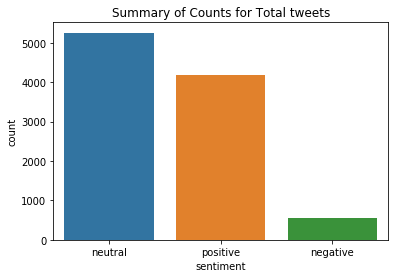

In [96]:
import seaborn as sns
sns.countplot(merged["sentiment"])
plt.title("Summary of Counts for Total tweets");

In [97]:
for i in range(1,len(bitcoin['close'])):
    merged.at[i,'price_difference']=bitcoin.at[i,'close']-bitcoin.at[i-1,'close']

In [98]:
merged.at[0,'price_difference']=0.0

In [100]:
merged.head(2)

,open,close,high,low,volume,clean_tweet,sentiment,polarity,subjectivity,sentiment_score,price_difference
0,60025.0,60030.669608,60031.0,60025.0,0.060630,Empty,neutral,0.0,0.0,1,0.000000
1,60031.0,60012.000000,60031.0,60012.0,0.909728,Empty,neutral,0.0,0.0,1,-18.669608


In [101]:
merged['target'] = 0
for i in range(10000):
    if merged.price_difference[i] > 0:
        merged['target'][i] = 1 
        
# 0 - price goes down
# 1 - price goes up

merged.head()

,open,close,high,low,volume,clean_tweet,sentiment,polarity,subjectivity,sentiment_score,price_difference,target
0,60025.0,60030.669608,60031.000000,60025.0,0.060630,Empty,neutral,0.0,0.0,1,0.000000,0
1,60031.0,60012.000000,60031.000000,60012.0,0.909728,Empty,neutral,0.0,0.0,1,-18.669608,0
2,60013.0,60013.000000,60013.934448,60013.0,0.390078,Empty,neutral,0.0,0.0,1,1.000000,1
3,60013.0,60000.000000,60014.000000,60000.0,1.960719,Empty,neutral,0.0,0.0,1,-13.000000,0
4,60000.0,60000.000000,60000.482297,60000.0,2.269179,Empty,neutral,0.0,0.0,1,0.000000,0


In [103]:
features = merged[['open','high','low','close','volume','polarity','subjectivity','sentiment_score']]
X = np.array(features)
y = np.array(merged['target'])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                        min_samples_leaf=100,
                                        min_samples_split=6,
                                        random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [106]:
y_predicted = clf.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print( classification_report(y_test, y_predicted) )

              precision    recall  f1-score   support

           0       0.55      0.47      0.51       986
           1       0.55      0.62      0.58      1014

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.54      2000
weighted avg       0.55      0.55      0.54      2000



In [108]:
accuracy_score(y_test,y_predicted)*100

54.75

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [110]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [111]:
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       986
           1       0.95      0.70      0.81      1014

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.83      2000
weighted avg       0.86      0.83      0.83      2000



In [112]:
accuracy_score(y_test,predictions)*100

83.25

In [113]:
import pickle

## Dumping the model into a pickle file

In [114]:
pickle.dump(model,open("model.pkl","wb"))